In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

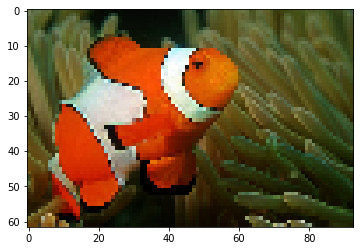

In [20]:
nemo = cv2.imread("nemo.jpg")
nemo = cv2.resize(nemo, (0, 0), fx=0.1, fy=0.1)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

plt.imshow(nemo)

In [21]:
nemo.shape

(62, 93, 3)

In [22]:
pixel_colors = nemo.reshape((nemo.shape[0]*nemo.shape[1], 3)) / 255.0

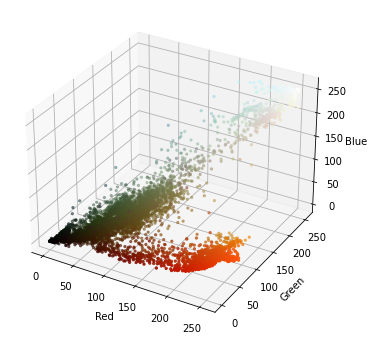

In [23]:
R, G, B = cv2.split(nemo)

fig = plt.figure(figsize=(12, 6))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()


In [24]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(nemo_hsv)

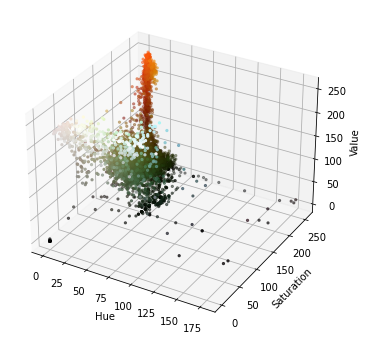

In [25]:
fig = plt.figure(figsize=(12, 6))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolor=pixel_colors, marker='.')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()


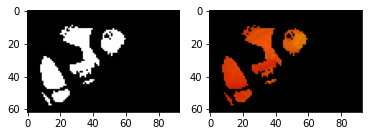

In [26]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)

result = cv2.bitwise_and(nemo, nemo, mask=mask_orange)

plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

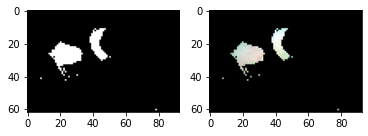

In [27]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)

result = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

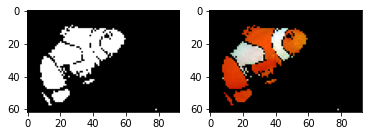

In [28]:
final_mask = mask_orange + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [29]:
X_train = np.array([H.flatten(), S.flatten(), V.flatten()]).T
print(X_train.shape)
X_train

(5766, 3)


array([[ 40,  68, 123],
       [ 39, 100, 102],
       [ 46,  85, 114],
       ...,
       [ 35, 224,  41],
       [ 31, 227,  36],
       [ 35, 240,  34]], dtype=uint8)

In [30]:
Y_train = np.zeros((nemo.shape[0]*nemo.shape[1], 1))
Y_train.shape

(5766, 1)

In [31]:
indexes = np.where(final_mask.flatten() != 0)
indexes = indexes[0]

Y_train[indexes] = 1
Y_train = Y_train.astype(dtype='uint8').flatten()

print(Y_train.shape)
Y_train

(5766,)


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
from knn_nemo import KNearestNeighbors

In [33]:
my_knn = KNearestNeighbors(k=15)
my_knn.fit(X_train, Y_train)

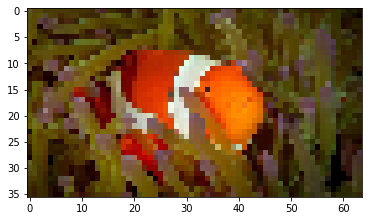

In [44]:
nemo_brother = cv2.imread("brother-nemo.jpg")
nemo_brother = cv2.resize(nemo_brother, (0, 0), fx=0.1, fy=0.1)
nemo_brother = cv2.cvtColor(nemo_brother, cv2.COLOR_BGR2RGB)

plt.imshow(nemo_brother)

In [45]:
nemo_brother_hsv = cv2.cvtColor(nemo_brother, cv2.COLOR_RGB2HSV)
X_test = nemo_brother_hsv.reshape(nemo_brother_hsv.shape[0]*nemo_brother_hsv.shape[1], 3)

In [46]:
answer = my_knn.predict(X_test)
answer

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

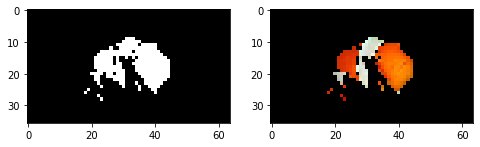

In [47]:
test_mask = answer.reshape((nemo_brother_hsv.shape[0], nemo_brother_hsv.shape[1])).astype("uint8")
test_result = cv2.bitwise_and(nemo_brother, nemo_brother, mask=test_mask)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(test_result)
plt.show()
